In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import numpy as np
import pandas as pd

In [2]:
def read_loss(FILE_PATH, MAX_ITERS):
    iterations = []
    D_A = []
    G_A = []
    cycle_A = []
    idt_A = []
    D_B = []
    G_B = []
    cycle_B = []
    idt_b = []
    epoch_list = []
    
    with open(FILE_PATH, "r") as file:
        for line in file.readlines():
            line = line.split(" ")

            #Skip header
            if(line[0].startswith("=")):
                continue

            epoch = int(line[1][0:-1])
            epoch_list.append(int(epoch))

            iters = int(line[3][0:-1])

            iterations.append((epoch-1)*MAX_ITERS+iters) 

            D_A.append(float(line[9]))

            G_A.append(float(line[11]))

            cycle_A.append(float(line[13]))

            idt_A.append(float(line[15]))

            D_B.append(float(line[17]))

            G_B.append(float(line[19]))

            cycle_B.append(float(line[21]))

            idt_b.append(float(line[23]))

    return D_A, G_A, cycle_A, idt_A, D_B, G_B, cycle_B, idt_b, iterations

In [3]:
#Read ssim:
SSIM_PATH = "./loss_data/ssim_monet.txt"
H2Z_MAX_ITERS = 6287
EPOCHS = 100
sD_A, sG_A, scycle_A, sidt_A, sD_B, sG_B, scycle_B, sidt_b, siterations = read_loss(SSIM_PATH, H2Z_MAX_ITERS)


#Read baseline:
BASELINE_PATH = "./loss_data/loss_log.txt"
H2Z_MAX_ITERS = 6287
bD_A, bG_A, bcycle_A, bidt_A, bD_B, bG_B, bcycle_B, bidt_b, biterations = read_loss(BASELINE_PATH, H2Z_MAX_ITERS)

In [4]:
# Computes the moving average for losses  
def moving_average(loss):
    series = pd.Series(loss)
    rolling_series = series.rolling(100).mean()
    return rolling_series

# Plots both SSIM and Baseline. (Comparable)
def plot_loss(itr1, loss1, itr2, loss2, title, ylimrange):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.plot(itr1, moving_average(loss1))
    ax2.plot(itr2, moving_average(loss2))
    ax1.set(xlabel='Iterations', ylabel='Loss', title='SSIM', ylim=ylimrange)#
    ax2.set(xlabel='Iterations', ylabel='Loss', title='Baseline', ylim=ylimrange)#
    fig.set_figheight(6)
    fig.set_figwidth(16)
    return 1
    
#Plots a single loss file  
def plot_loss2(itr1, loss1, itr2, loss2, title, ylimrange):
    fig = plt.figure()
    ax = plt.gca()
    fig.suptitle("Baseline",fontweight="bold")
    ax.plot(itr2, moving_average(loss2))
    ax.set(ylim=ylimrange)#
    
    fig.set_figheight(4)
    fig.set_figwidth(6)
    
    plt.title(title,fontweight="bold")
    plt.xlabel('Iterations', fontweight='bold')
    plt.ylabel('Loss', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

1

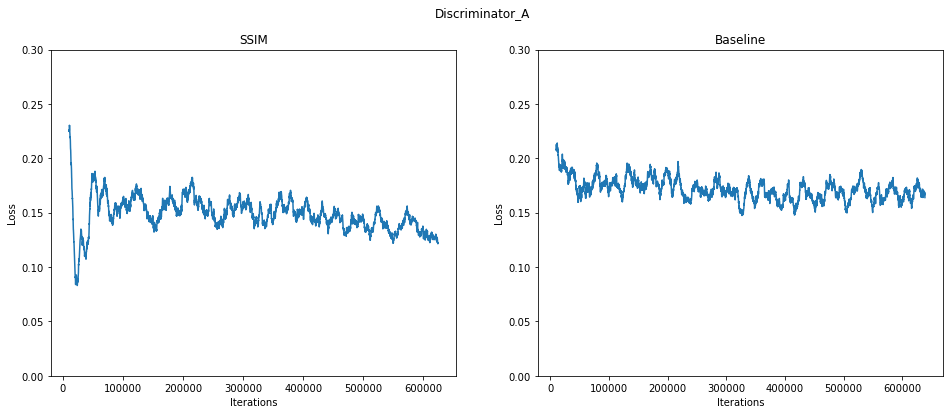

In [5]:
#Plot the average over time. 

# Discriminator_A
plot_loss(siterations, sD_A, biterations, bD_A, "Discriminator_A", ([0, 0.3]))

1

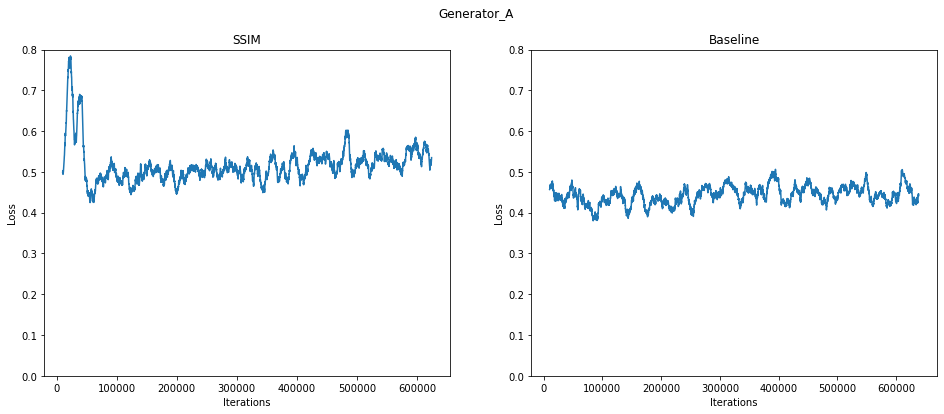

In [6]:
# Generator A
#Optimal is -log(2) 
plot_loss(siterations, sG_A, biterations, bG_A, "Generator_A", [0, 0.8])

# Man kan se at lære over tid. 

1

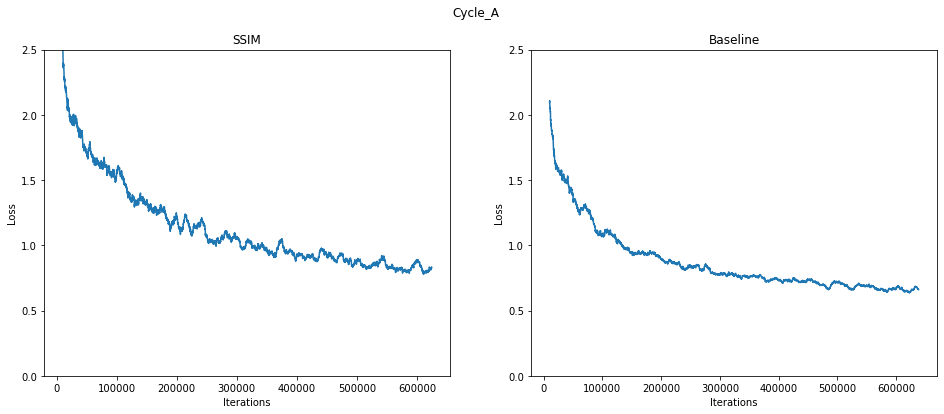

In [7]:
# Cycle_A
plot_loss(siterations, scycle_A, biterations, bcycle_A, "Cycle_A", [0, 2.5])

1

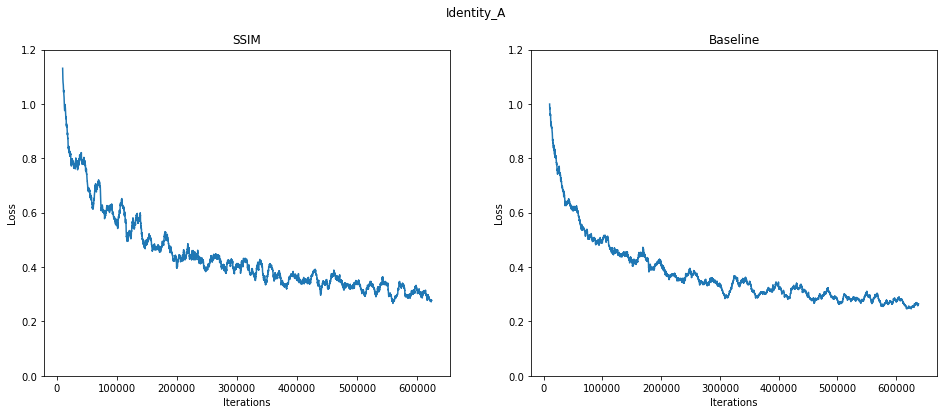

In [8]:
# Identity A 
plot_loss(siterations, sidt_A, biterations, bidt_A, "Identity_A", [0, 1.2])

1

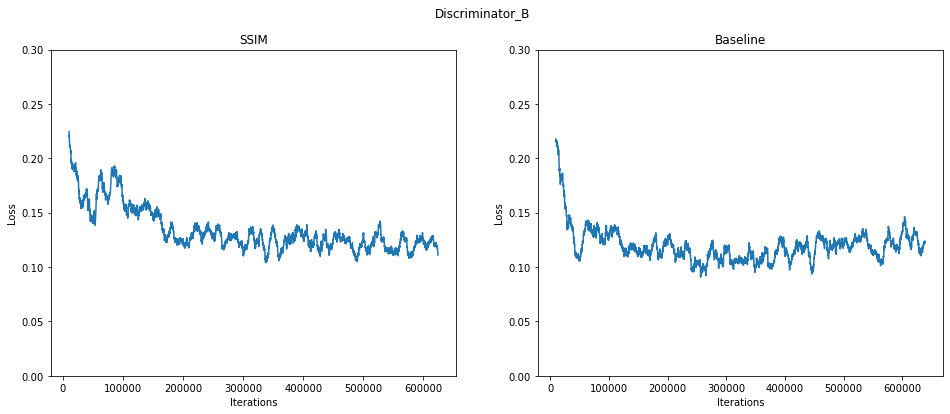

In [9]:
#D_B
# Discriminator A
plot_loss(siterations, sD_B, biterations, bD_B, "Discriminator_B", [0, 0.30])

1

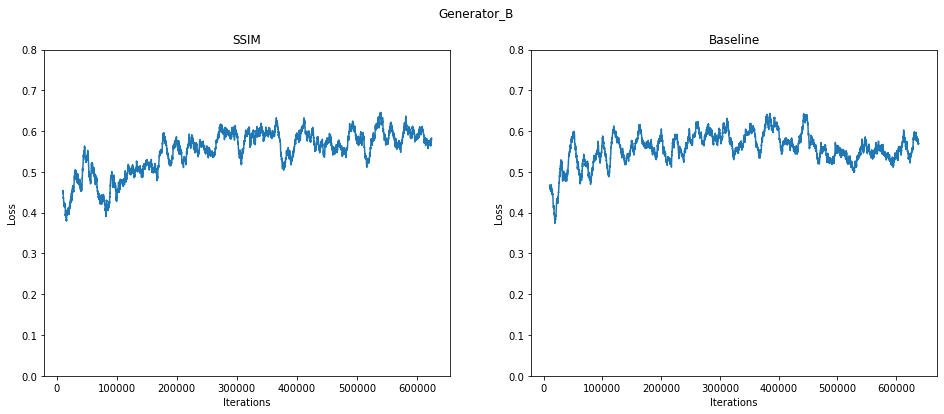

In [10]:
#G_B
plot_loss(siterations, sG_B, biterations, bG_B, "Generator_B", [0, 0.8])

1

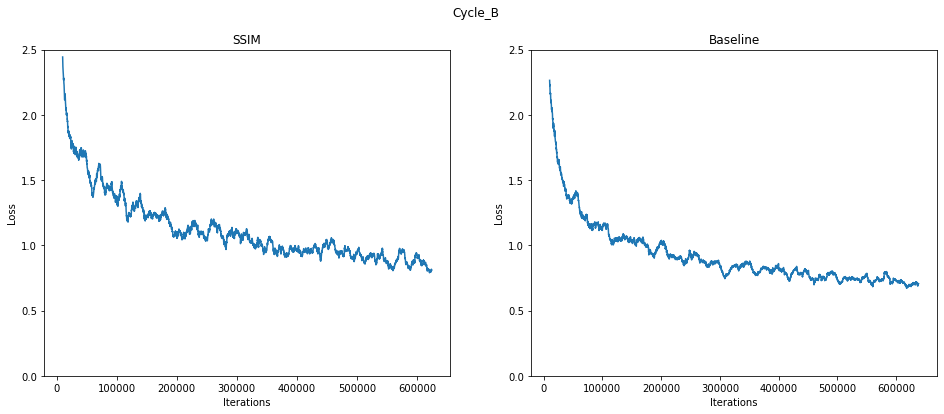

In [11]:
#Cycle_B
plot_loss(siterations, scycle_B, biterations, bcycle_B, "Cycle_B", [0,2.5])

1

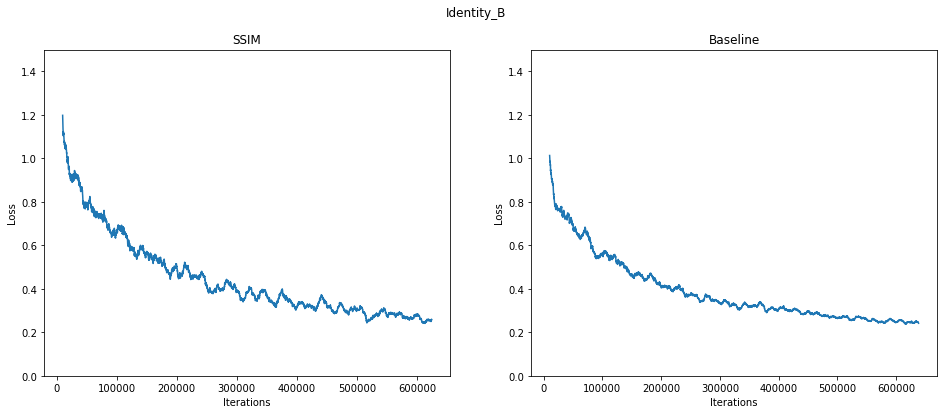

In [12]:
#Idt_B
plot_loss(siterations, sidt_b, biterations, bidt_b, "Identity_B", [0, 1.5])